In [1]:
with open("car.data") as file:
    lines = file.readlines()

In [2]:
len(lines)

1728

In [3]:
lines[:5]

['vhigh,vhigh,2,2,small,low,unacc\n',
 'vhigh,vhigh,2,2,small,med,unacc\n',
 'vhigh,vhigh,2,2,small,high,unacc\n',
 'vhigh,vhigh,2,2,med,low,unacc\n',
 'vhigh,vhigh,2,2,med,med,unacc\n']

In [4]:
for i in range(len(lines)):
    lines[i] = lines[i].split(",")

In [5]:
lines[:5]

[['vhigh', 'vhigh', '2', '2', 'small', 'low', 'unacc\n'],
 ['vhigh', 'vhigh', '2', '2', 'small', 'med', 'unacc\n'],
 ['vhigh', 'vhigh', '2', '2', 'small', 'high', 'unacc\n'],
 ['vhigh', 'vhigh', '2', '2', 'med', 'low', 'unacc\n'],
 ['vhigh', 'vhigh', '2', '2', 'med', 'med', 'unacc\n']]

In [6]:
for i in lines:
    i[6] = i[6][:-1]
lines[:5]

[['vhigh', 'vhigh', '2', '2', 'small', 'low', 'unacc'],
 ['vhigh', 'vhigh', '2', '2', 'small', 'med', 'unacc'],
 ['vhigh', 'vhigh', '2', '2', 'small', 'high', 'unacc'],
 ['vhigh', 'vhigh', '2', '2', 'med', 'low', 'unacc'],
 ['vhigh', 'vhigh', '2', '2', 'med', 'med', 'unacc']]

In [7]:
buying_price = []
maintenance_price = []
number_of_doors = []
persons_to_carry = []
size_of_luggage_boot = []
safety_of_the_car = []
acceptance = []

In [8]:
for i in lines:
    buying_price.append(i[0])
    maintenance_price.append(i[1])
    number_of_doors.append(i[2])
    persons_to_carry.append(i[3])
    size_of_luggage_boot.append(i[4])
    safety_of_the_car.append(i[5])
    acceptance.append(i[6])

In [9]:
for i in range(len(number_of_doors)):
    if len(number_of_doors[i]) > 1:
        number_of_doors[i] = number_of_doors[i][0]

In [10]:
for i in range(len(persons_to_carry)):
    if persons_to_carry[i] == "more":
        persons_to_carry[i] = "5"

In [11]:
import numpy as np
buying_price = np.array(buying_price)
maintenance_price = np.array(maintenance_price)
number_of_doors = np.array(number_of_doors)
persons_to_carry = np.array(persons_to_carry)
size_of_luggage_boot = np.array(size_of_luggage_boot)
safety_of_the_car = np.array(safety_of_the_car)
acceptance = np.array(acceptance)

In [12]:
print(buying_price.shape)
print(maintenance_price.shape)
print(number_of_doors.shape)
print(persons_to_carry.shape)
print(size_of_luggage_boot.shape)
print(safety_of_the_car.shape)
print(acceptance.shape)

(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)
(1728,)


In [13]:
buying_price = buying_price.reshape(1728,1)
maintenance_price = maintenance_price.reshape(1728,1)
number_of_doors = number_of_doors.reshape(1728,1)
persons_to_carry = persons_to_carry.reshape(1728,1)
size_of_luggage_boot = size_of_luggage_boot.reshape(1728,1)
safety_of_the_car = safety_of_the_car.reshape(1728,1)
acceptance = acceptance.reshape(1728,1)

In [14]:
import pandas as pd

In [15]:
data = pd.DataFrame(data = np.concatenate((buying_price, maintenance_price, number_of_doors,
                    persons_to_carry, size_of_luggage_boot, safety_of_the_car,
                    acceptance), axis=1), columns=["buying_price", "maintenance_price", "number_of_doors",
                    "persons_to_carry", "size_of_luggage_boot", "safety_of_the_car",
                    "acceptance"])
data.head()

,buying_price,maintenance_price,number_of_doors,persons_to_carry,size_of_luggage_boot,safety_of_the_car,acceptance
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying_price            1728 non-null object
maintenance_price       1728 non-null object
number_of_doors         1728 non-null object
persons_to_carry        1728 non-null object
size_of_luggage_boot    1728 non-null object
safety_of_the_car       1728 non-null object
acceptance              1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


In [17]:
data.describe()

,buying_price,maintenance_price,number_of_doors,persons_to_carry,size_of_luggage_boot,safety_of_the_car,acceptance
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,3,5,big,low,unacc
freq,432,432,432,576,576,576,1210


In [18]:
data["acceptance"].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: acceptance, dtype: int64

In [19]:
data["number_of_doors"] = data["number_of_doors"].apply(np.int)

In [20]:
data["persons_to_carry"] = data["persons_to_carry"].apply(np.int)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying_price            1728 non-null object
maintenance_price       1728 non-null object
number_of_doors         1728 non-null int64
persons_to_carry        1728 non-null int64
size_of_luggage_boot    1728 non-null object
safety_of_the_car       1728 non-null object
acceptance              1728 non-null object
dtypes: int64(2), object(5)
memory usage: 94.6+ KB


In [22]:
def clean(x):
    if x == "low":
        return 1
    if x == "med":
        return 2
    if x == "high":
        return 3
    if x == "vhigh":
        return 4

In [23]:
data["buying_price"] = data["buying_price"].apply(clean)
data["maintenance_price"] =data["maintenance_price"].apply(clean)

In [24]:
data.head()

,buying_price,maintenance_price,number_of_doors,persons_to_carry,size_of_luggage_boot,safety_of_the_car,acceptance
0,4,4,2,2,small,low,unacc
1,4,4,2,2,small,med,unacc
2,4,4,2,2,small,high,unacc
3,4,4,2,2,med,low,unacc
4,4,4,2,2,med,med,unacc


In [25]:
def clean(x):
    if x == "small":
        return 1
    if x == "med":
        return 2
    if x == "big":
        return 3

In [26]:
data["size_of_luggage_boot"] = data["size_of_luggage_boot"].apply(clean)
#data["safety_of_the_car"] = data["safety_of_the_car"].apply(clean)
data.head()

,buying_price,maintenance_price,number_of_doors,persons_to_carry,size_of_luggage_boot,safety_of_the_car,acceptance
0,4,4,2,2,1,low,unacc
1,4,4,2,2,1,med,unacc
2,4,4,2,2,1,high,unacc
3,4,4,2,2,2,low,unacc
4,4,4,2,2,2,med,unacc


In [27]:
def clean(x):
    if x == "low":
        return 1
    if x == "med":
        return 2
    if x == "high":
        return 3

In [28]:
data["safety_of_the_car"] = data["safety_of_the_car"].apply(clean)

In [29]:
data.head()

,buying_price,maintenance_price,number_of_doors,persons_to_carry,size_of_luggage_boot,safety_of_the_car,acceptance
0,4,4,2,2,1,1,unacc
1,4,4,2,2,1,2,unacc
2,4,4,2,2,1,3,unacc
3,4,4,2,2,2,1,unacc
4,4,4,2,2,2,2,unacc


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying_price            1728 non-null int64
maintenance_price       1728 non-null int64
number_of_doors         1728 non-null int64
persons_to_carry        1728 non-null int64
size_of_luggage_boot    1728 non-null int64
safety_of_the_car       1728 non-null int64
acceptance              1728 non-null object
dtypes: int64(6), object(1)
memory usage: 94.6+ KB


In [31]:
data = data.sample(frac=1.).reset_index(drop=True)
data.head()

,buying_price,maintenance_price,number_of_doors,persons_to_carry,size_of_luggage_boot,safety_of_the_car,acceptance
0,1,3,3,2,2,3,unacc
1,3,1,2,2,2,1,unacc
2,4,2,3,5,1,2,unacc
3,3,1,4,2,2,2,unacc
4,2,3,2,5,1,1,unacc


In [32]:
X = data.iloc[:,0:6].values
y = data.iloc[:,6].values
print(X.shape, y.shape)

(1728, 6) (1728,)


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

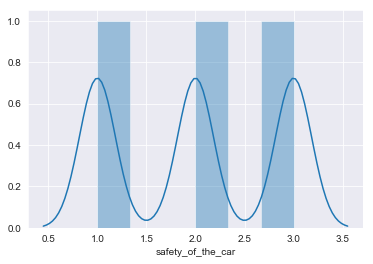

In [34]:
sns.distplot(data["safety_of_the_car"]);

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [37]:
lr = LogisticRegression()
lr.fit(X_train,y_train);

C:\Users\Conan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Conan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [38]:
predictions = lr.predict(X_test)

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         acc       0.66      0.55      0.60       139
        good       0.38      0.14      0.21        21
       unacc       0.86      0.97      0.91       392
       vgood       0.25      0.05      0.09        19

   micro avg       0.80      0.80      0.80       571
   macro avg       0.53      0.43      0.45       571
weighted avg       0.77      0.80      0.78       571



In [40]:
y = pd.get_dummies(data["acceptance"]).iloc[:,:].values
y.shape

(1728, 4)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [42]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

Using TensorFlow backend.


In [43]:
model = Sequential()
model.add(Dense(16,activation="sigmoid",input_dim=6))
model.add(Dense(8,activation="sigmoid"))
model.add(Dense(4,activation="softmax"))

In [44]:
model.compile(optimizer=Adam(lr=0.01),metrics=["accuracy"],loss="categorical_crossentropy")

In [45]:
model.fit(X_train,y_train,epochs=90,verbose=1,validation_data=(X_test,y_test))

Train on 1157 samples, validate on 571 samples
Epoch 1/90
1157/1157 [==============================] - 4s 4ms/step - loss: 0.9098 - acc: 0.7010 - val_loss: 0.8136 - val_acc: 0.6865
Epoch 2/90
1157/1157 [==============================] - 0s 93us/step - loss: 0.7929 - acc: 0.7070 - val_loss: 0.7637 - val_acc: 0.6865
Epoch 3/90
1157/1157 [==============================] - 0s 93us/step - loss: 0.7170 - acc: 0.7070 - val_loss: 0.6451 - val_acc: 0.6865
Epoch 4/90
1157/1157 [==============================] - 0s 103us/step - loss: 0.6191 - acc: 0.7390 - val_loss: 0.5613 - val_acc: 0.7828
Epoch 5/90
1157/1157 [==============================] - 0s 115us/step - loss: 0.5519 - acc: 0.7727 - val_loss: 0.5112 - val_acc: 0.8196
Epoch 6/90
1157/1157 [==============================] - 0s 115us/step - loss: 0.5151 - acc: 0.7900 - val_loss: 0.4724 - val_acc: 0.8319
Epoch 7/90
1157/1157 [==============================] - 0s 102us/step - loss: 0.4712 - acc: 0.8099 - val_loss: 0.4369 - val_acc: 0.8476
Epoch

Epoch 61/90
1157/1157 [==============================] - 0s 105us/step - loss: 0.1279 - acc: 0.9447 - val_loss: 0.1931 - val_acc: 0.9212
Epoch 62/90
1157/1157 [==============================] - 0s 99us/step - loss: 0.1323 - acc: 0.9499 - val_loss: 0.1841 - val_acc: 0.9282
Epoch 63/90
1157/1157 [==============================] - 0s 96us/step - loss: 0.1686 - acc: 0.9343 - val_loss: 0.1673 - val_acc: 0.9229
Epoch 64/90
1157/1157 [==============================] - 0s 97us/step - loss: 0.1318 - acc: 0.9507 - val_loss: 0.1883 - val_acc: 0.9247
Epoch 65/90
1157/1157 [==============================] - 0s 97us/step - loss: 0.1359 - acc: 0.9438 - val_loss: 0.1601 - val_acc: 0.9370
Epoch 66/90
1157/1157 [==============================] - 0s 98us/step - loss: 0.1240 - acc: 0.9525 - val_loss: 0.1526 - val_acc: 0.9405
Epoch 67/90
1157/1157 [==============================] - 0s 99us/step - loss: 0.1243 - acc: 0.9542 - val_loss: 0.2008 - val_acc: 0.9159
Epoch 68/90
1157/1157 [========================

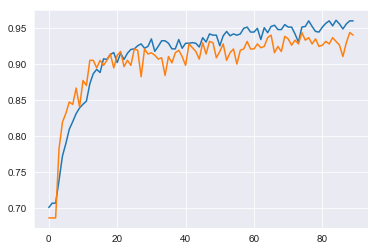

In [46]:
plt.plot(model.history.history["acc"]);
plt.plot(model.history.history["val_acc"]);